# Bike Sharing Dataset

<img src="https://www.economist.com/sites/default/files/imagecache/640-width/20170930_BLP508.jpg">

This is a dataset that tells us about the bike sharing data in the city of washington DC, USA.
Now we try to analyse the dataset and try to get some useful information from it.

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [4]:
Bike=pd.read_csv('Bike.csv')
Bike.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-08-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


This Dataset has 731 DataPoints for the Bike Sharing Data.<br>
Here,
    - instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

Now we try to see what the data looks like

In [6]:
print(Bike.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


Now,Let's Check for Null Values in the DataSet.

In [9]:
print(Bike.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


This Shows us that there are no Null Values Present in the DataSet.

Now Let's See how the distributionof cnt.

c:\users\ajish\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


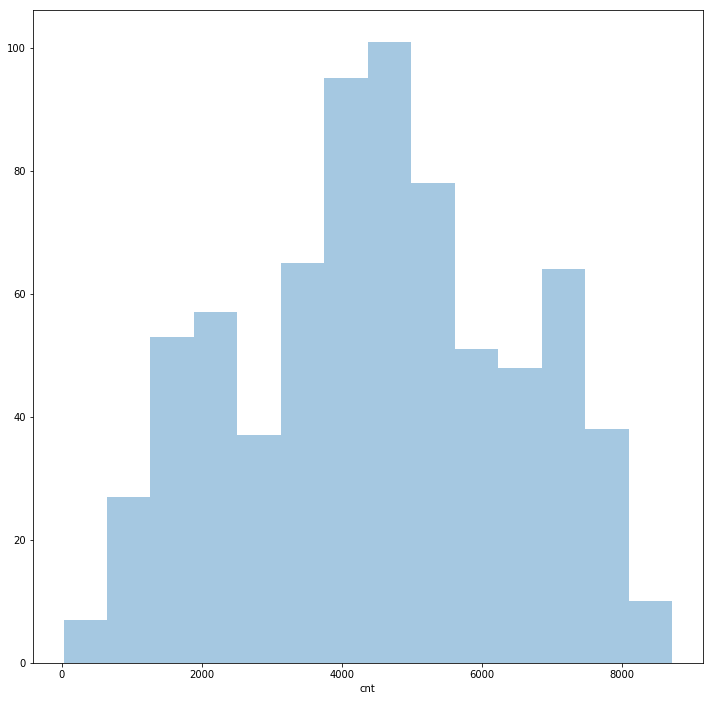

In [19]:
plt.figure(figsize=(12,12))
sns.distplot(Bike['cnt'],kde=False)
plt.show()

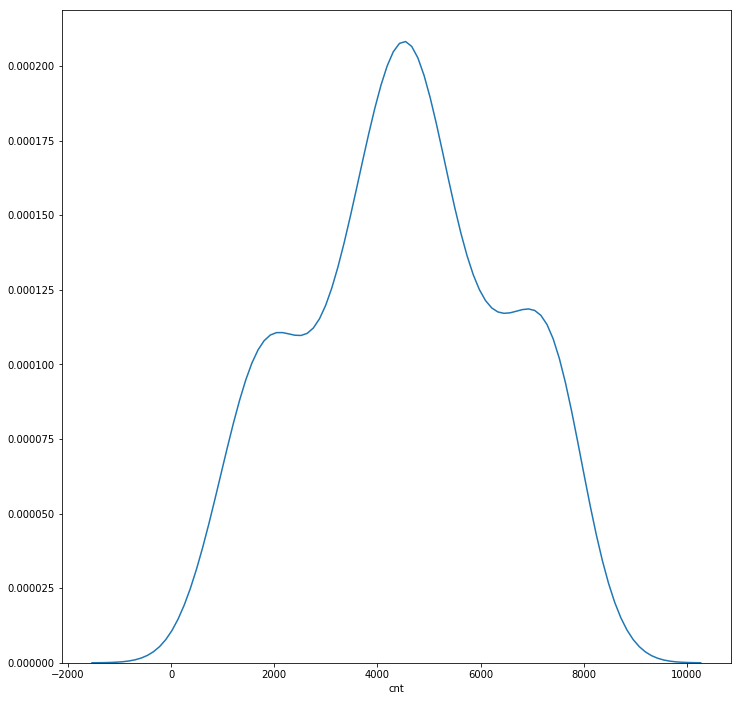

In [20]:
plt.figure(figsize=(12,12))
sns.distplot(Bike['cnt'],hist=False)
plt.show()

Here We, See that the the Maximum Data points Lie around the point 5000.<BR>
This means that there were about 100 days where the Count was around 5000.

Now,
Let's See if the day of the week affects the bike sharing.

c:\users\ajish\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


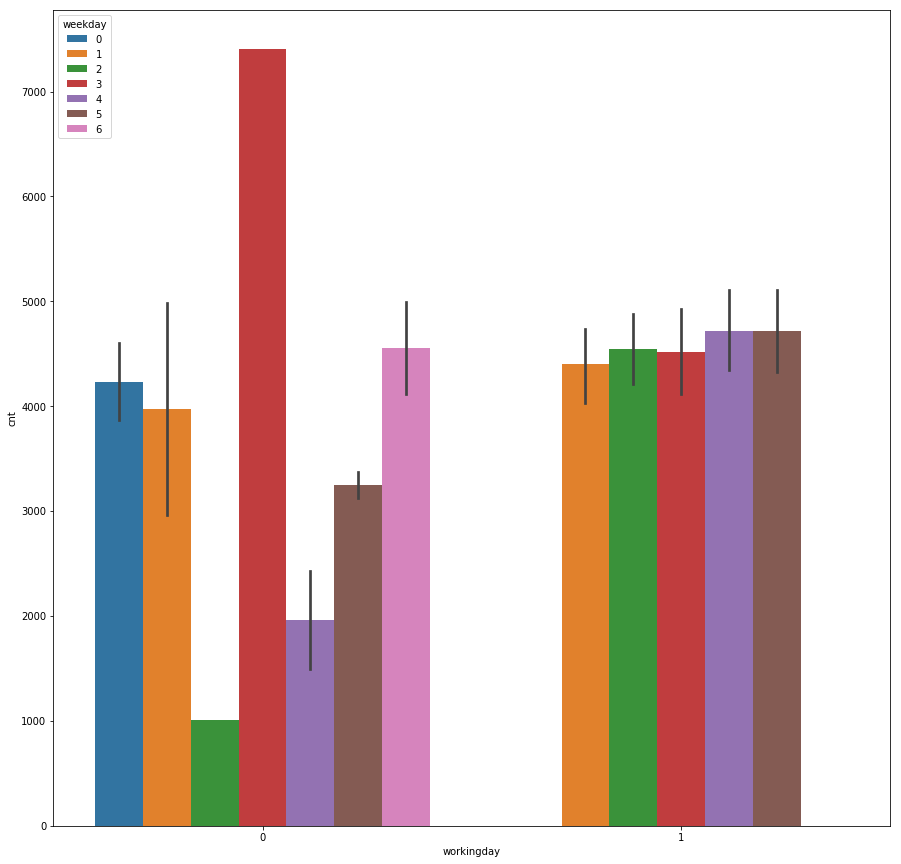

In [104]:
plt.figure(figsize=(15,15))
sns.barplot(data=Bike,y='cnt',x='workingday',hue='weekday')
plt.show()

Here we can see that if there is a pretty even distribution on the days there is not a holiday.
But on a Holiday wee see that the maximum Bikes were taken on Wednesday.<br>
The Least bikes were taken on Tuesdays that were a holiday.

Now let's see if the Weather affects the count of the Bike.

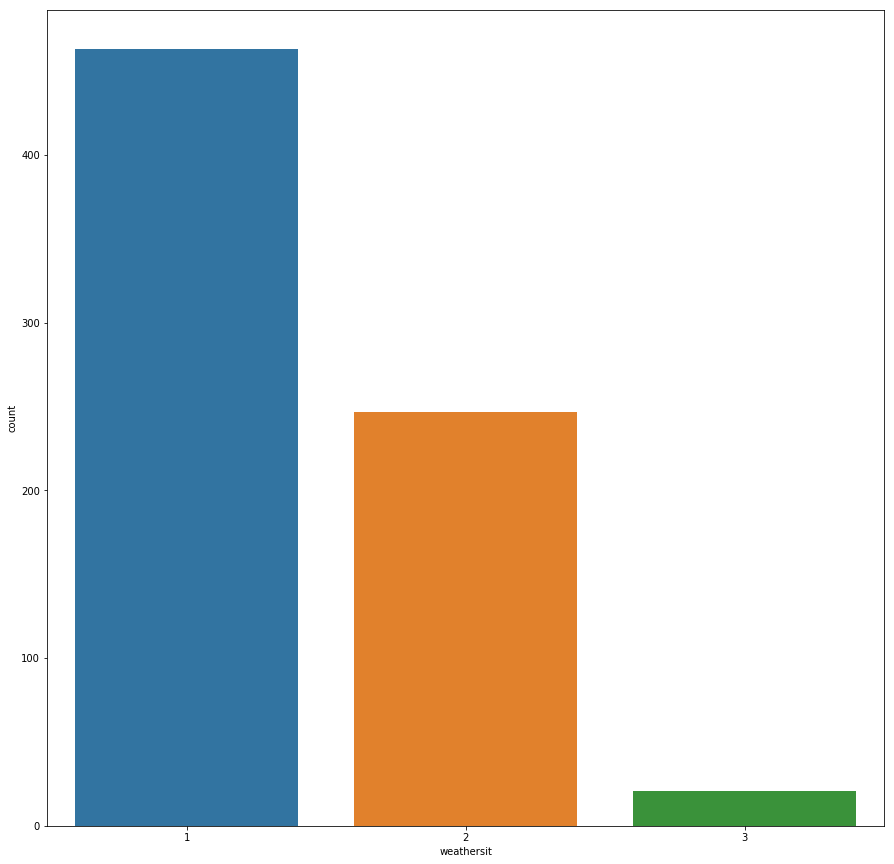

In [38]:
plt.figure(figsize=(15,15))
sns.countplot(data=Bike,x='weathersit')
plt.show()

In [39]:
print("The Number of bikes Shared when the weather is 1 is",end=' ')
print(Bike[Bike['weathersit']==1]['cnt'].sum())
print("The Number of bikes Shared when the weather is 2 is",end=' ')
print(Bike[Bike['weathersit']==2]['cnt'].sum())
print("The Number of bikes Shared when the weather is 3 is",end=' ')
print(Bike[Bike['weathersit']==3]['cnt'].sum())
print("The Number of bikes Shared when the weather is 4 is",end=' ')
print(Bike[Bike['weathersit']==4]['cnt'].sum())

The Number of bikes Shared when the weather is 1 is 2257952
The Number of bikes Shared when the weather is 2 is 996858
The Number of bikes Shared when the weather is 3 is 37869
The Number of bikes Shared when the weather is 4 is 0


<ul><li>From the Above Graphs we see that when the weather is(4) that is:- Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog <br>
We can see that no person shared Bike that day.</li><br>
<li>From the Above Graphs we see that when the weather is(3) that is:- Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds<br>
We can see that Significantly less people shared Bike that day.</li>
</ul>

c:\users\ajish\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


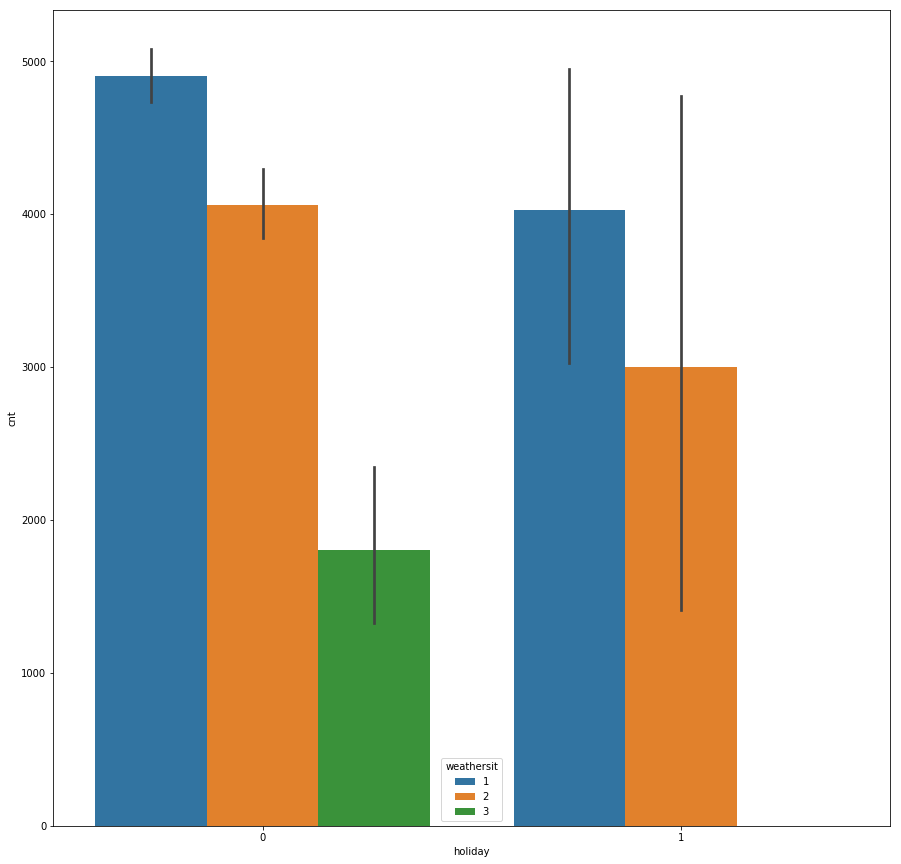

In [40]:
plt.figure(figsize=(15,15))
sns.barplot(data=Bike,y='cnt',x='holiday',hue='weathersit')
plt.show()

From the above Graphs we can deduce that:-
<ul>
    <li>When the weather is 3, that is Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds. And there is a holiday, No peopleshare the bike on that day</li>
    <li> Overall Too, The day there was a holiday, Significantly Less People Share the Bikes.</li>
</ul>

Now Let's try to deduce the connectons between wind Speed and The Count of poeple sharing the bikes.

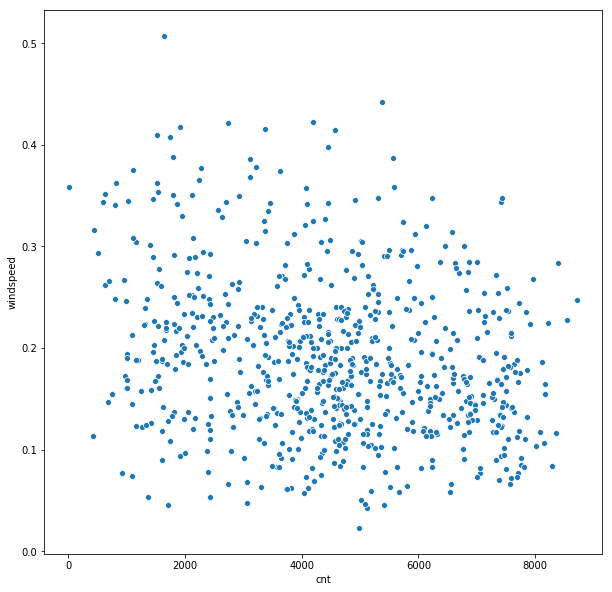

In [45]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=Bike['cnt'],y=Bike['windspeed'])
plt.show()

 Now Let's try to deduce the connectons between Temprature and The Count of poeple sharing the bikes.

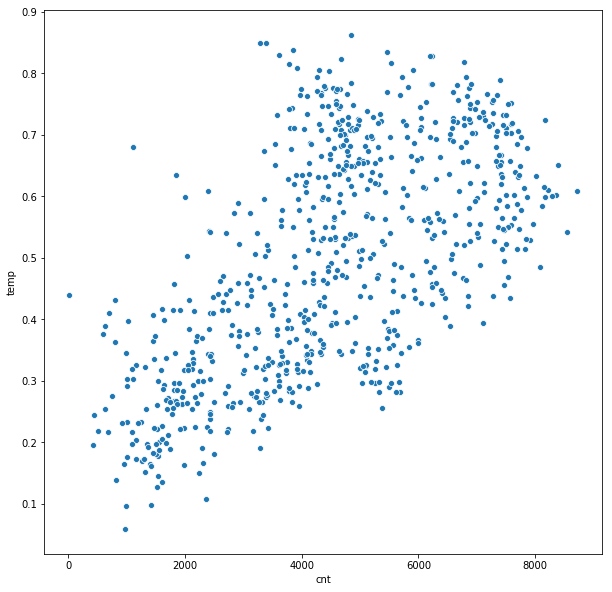

The Pearson Correlation Factor for the Columns Cnt and Temp is 0.6274940090334921


In [55]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=Bike['cnt'],y=Bike['temp'])
plt.show()
x=Bike['cnt']
y=Bike['temp']
r,p=pearsonr(x,y)
print("The Pearson Correlation Factor for the Columns Cnt and Temp is "+str(r))

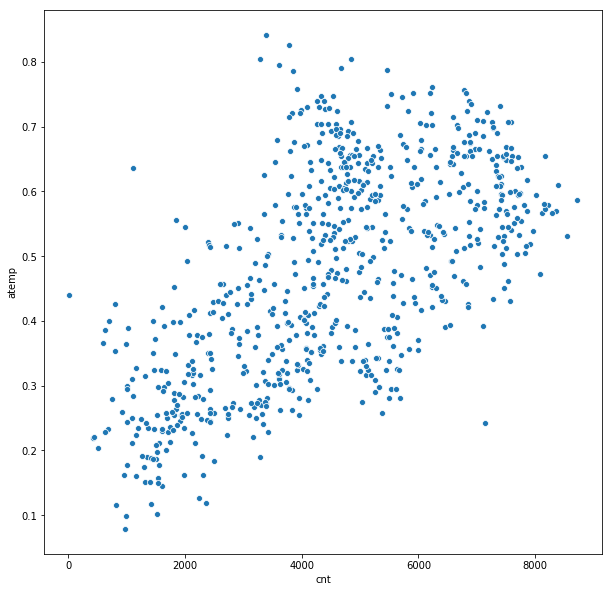

The Pearson Correlation Factor for the Columns cnt and atemp is 0.6310656998491811


In [59]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=Bike['cnt'],y=Bike['atemp'])
plt.show()
x=Bike['cnt']
y=Bike['atemp']
r,p=pearsonr(x,y)
print("The Pearson Correlation Factor for the Columns cnt and atemp is "+str(r))

Now Let's get back to the windspeed and Count.

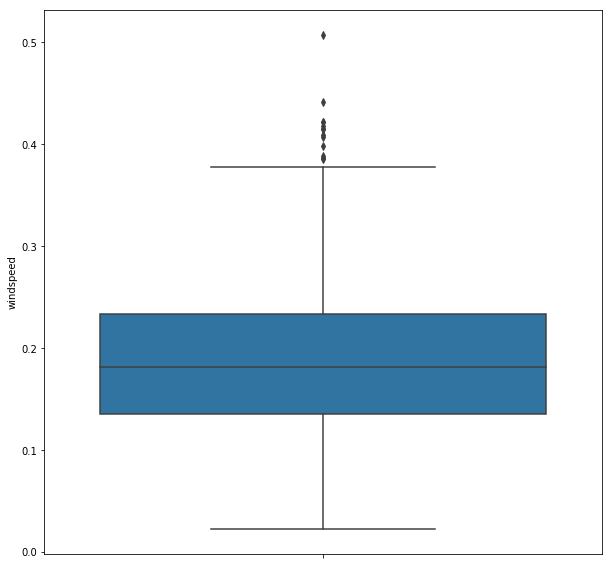

In [63]:
plt.figure(figsize=(10,10))
sns.boxplot(y=Bike['windspeed'])
plt.show()

Now,
<br>We will See the effect of weather on the count of Bikes Shared.

c:\users\ajish\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


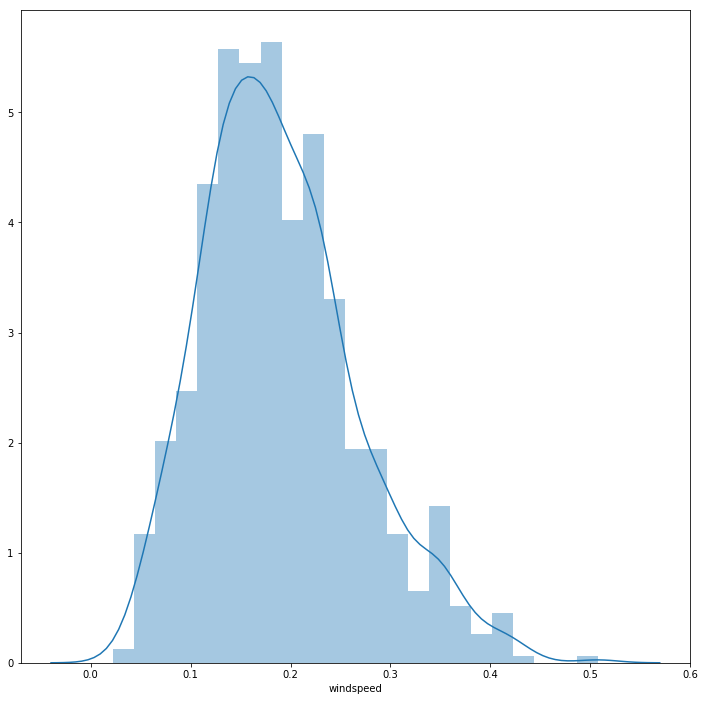

In [78]:
plt.figure(figsize=(12,12))
sns.distplot(Bike['windspeed'])
plt.show()

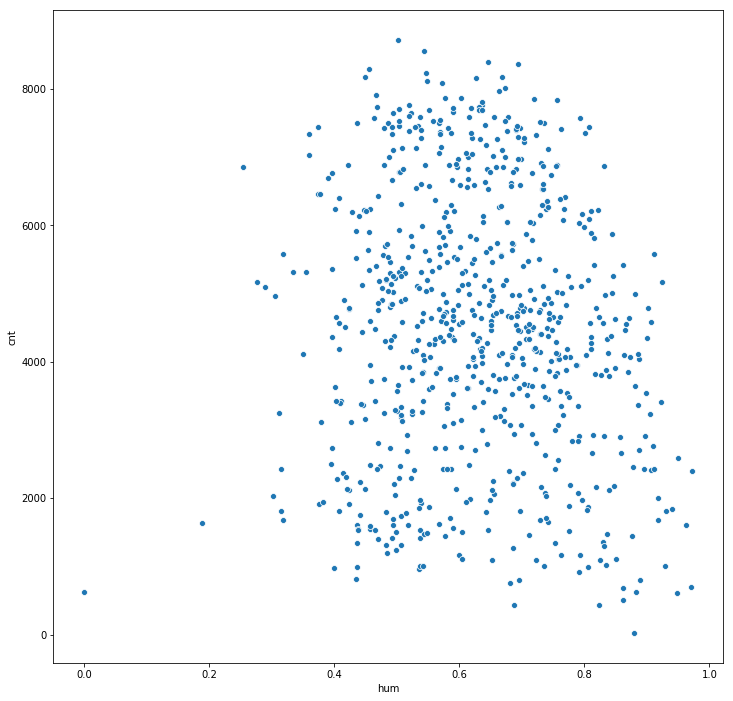

In [90]:
plt.figure(figsize=(12,12))
sns.scatterplot(x='hum',y='cnt',data=Bike)
plt.show()

c:\users\ajish\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


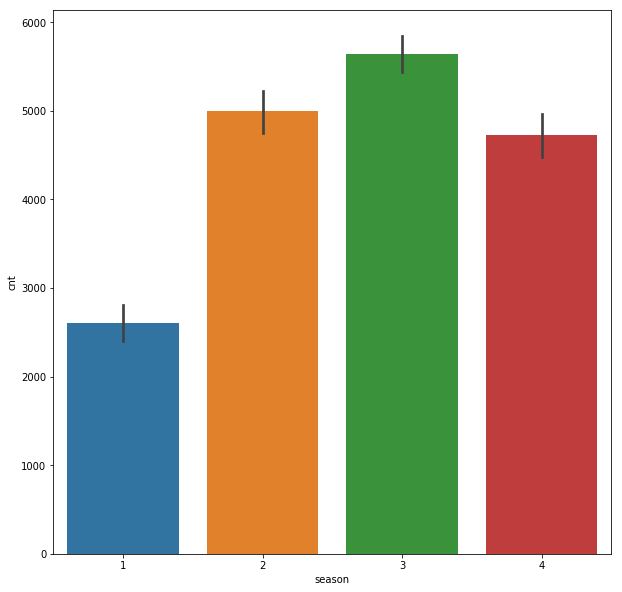

In [116]:
plt.figure(figsize=(10,10))
sns.barplot(data=Bike,x='season',y='cnt')
plt.show()

Let's see if the month has effect on the count of people sharing their bikes.

c:\users\ajish\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


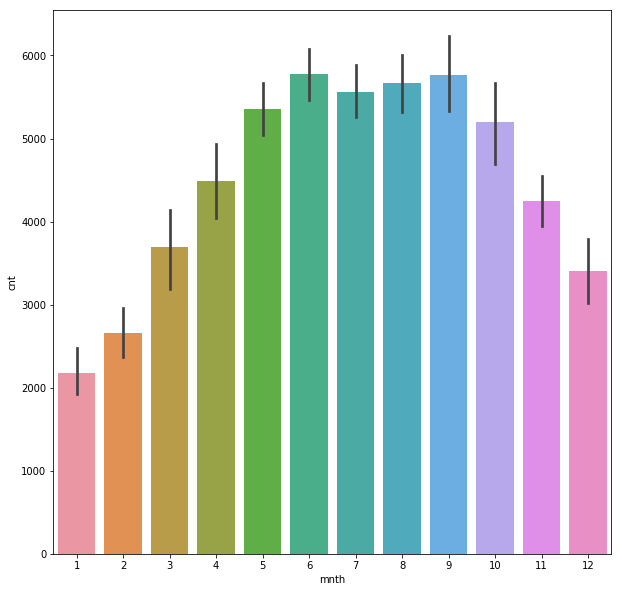

In [117]:
plt.figure(figsize=(10,10))
sns.barplot(y='cnt',x='mnth',data=Bike)
plt.show()

From the above graphswe can conclude that 
<ul>
    <li>the bike sharing counts drop in Winters,
especially in the month of January.</li>
    <li> The Bike Sharing count is maximum in the Season of Fall</li>
    <li>But, the Maximum Bike Sharing Counts are maximum in June</li> 
</ul>

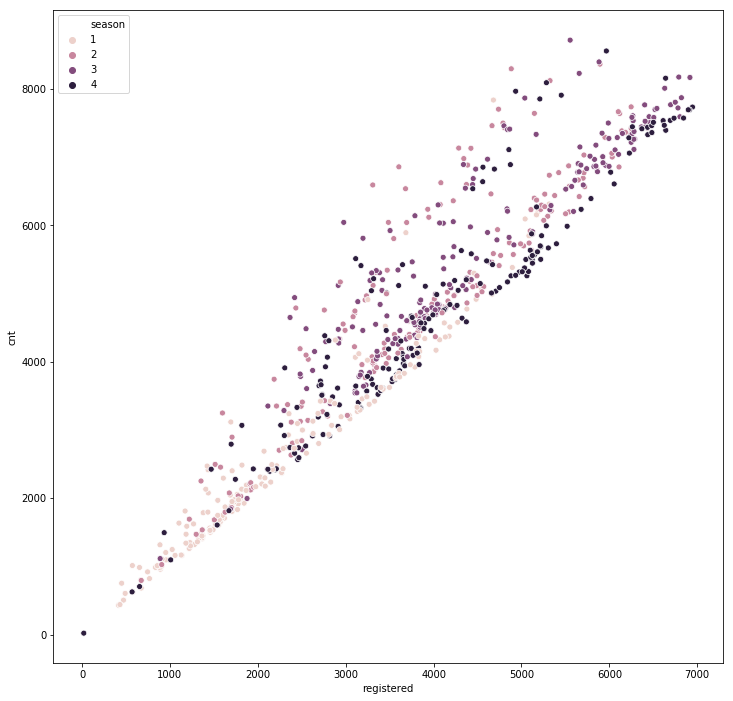

The Pearson Correlation Factor for the Columns Cnt and Registered is 0.9455169158090359


In [133]:
plt.figure(figsize=(12,12))
sns.scatterplot(x='registered',y='cnt',data=Bike,hue='season')
plt.show()
x=Bike['cnt']
y=Bike['registered']
r,p=pearsonr(x,y)
print("The Pearson Correlation Factor for the Columns Cnt and Registered is "+str(r))

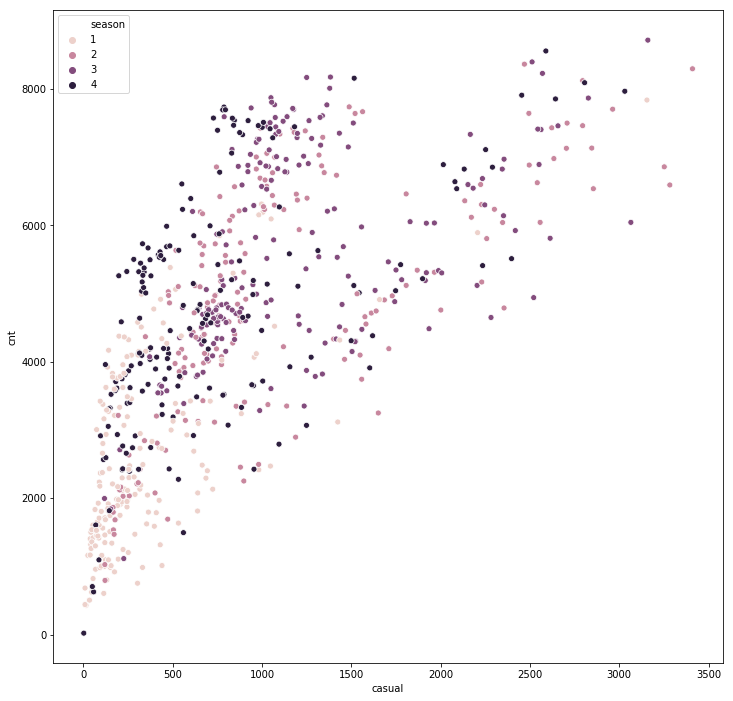

The Pearson Correlation Factor for the Columns Cnt and Casual is 0.6728044333386831


In [132]:
plt.figure(figsize=(12,12))
sns.scatterplot(x='casual',y='cnt',data=Bike,hue='season')
plt.show()
x=Bike['cnt']
y=Bike['casual']
r,p=pearsonr(x,y)
print("The Pearson Correlation Factor for the Columns Cnt and Casual is "+str(r))

<Figure size 2160x2160 with 0 Axes>

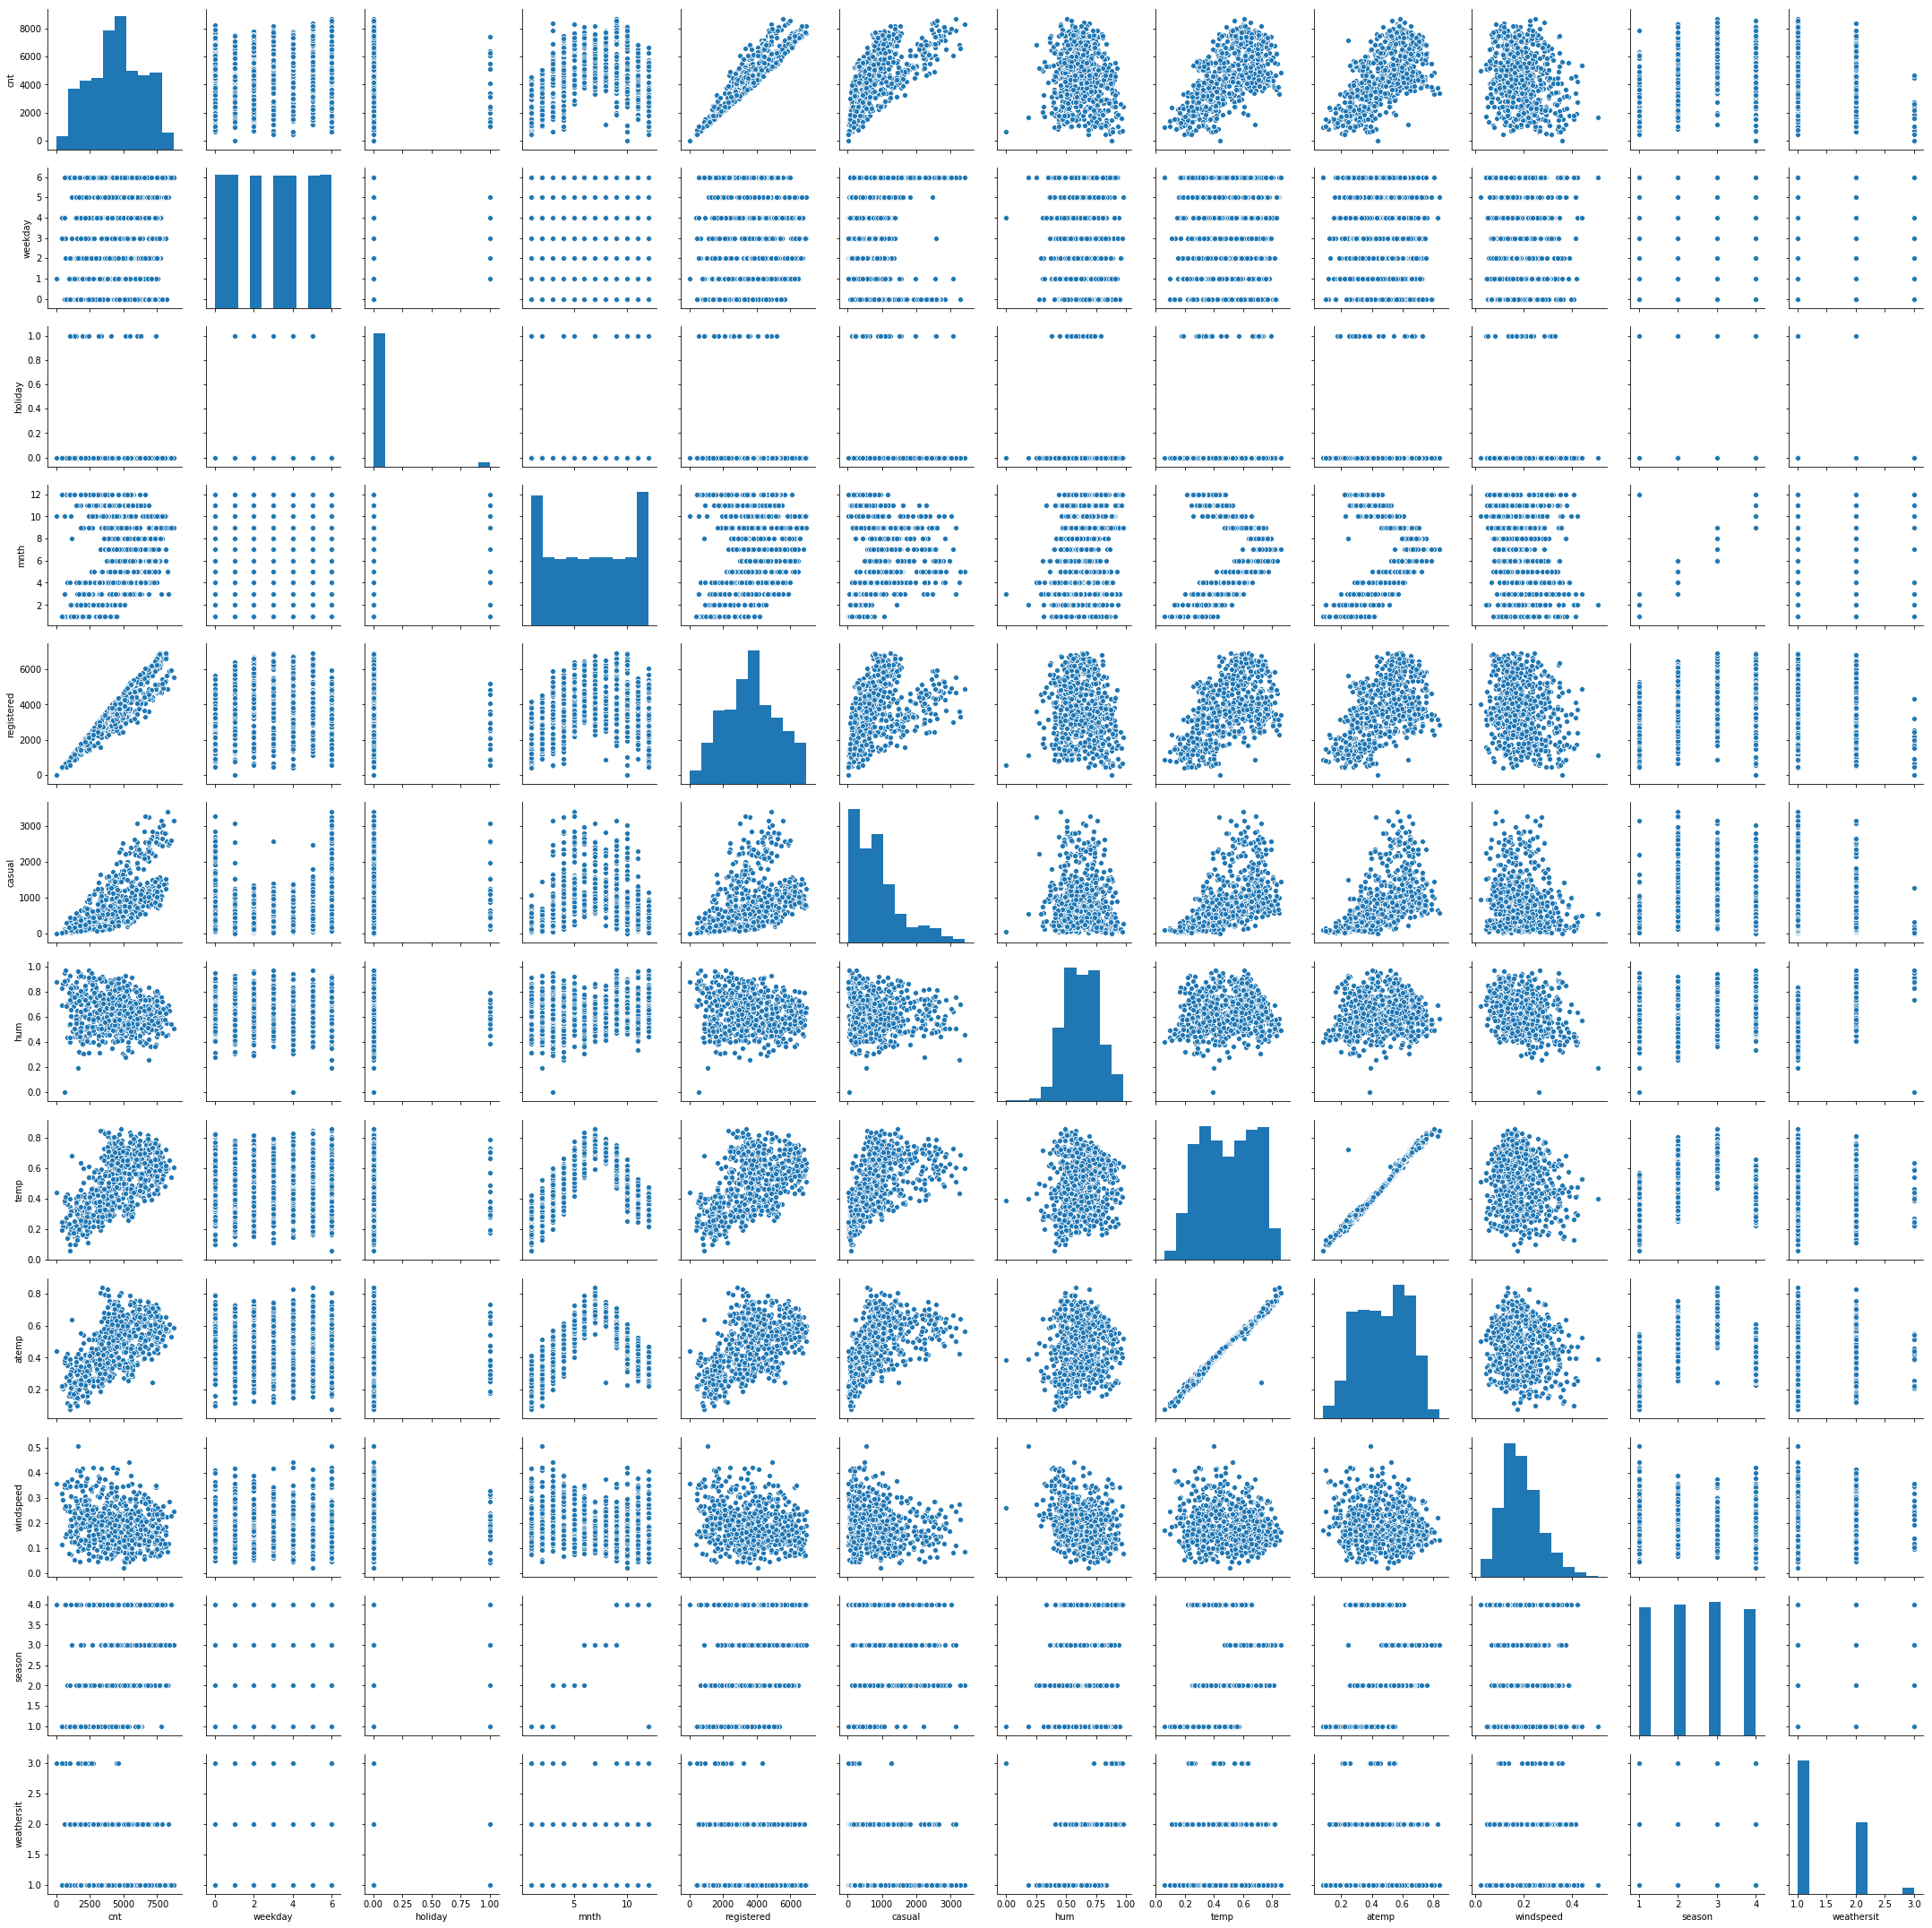

In [135]:
Cols=['cnt','weekday','holiday','mnth','registered','casual','hum','temp','atemp','windspeed','season','weathersit']
plt.figure(figsize=(30,30))
sns.pairplot(data=Bike,vars=Cols)
plt.show()

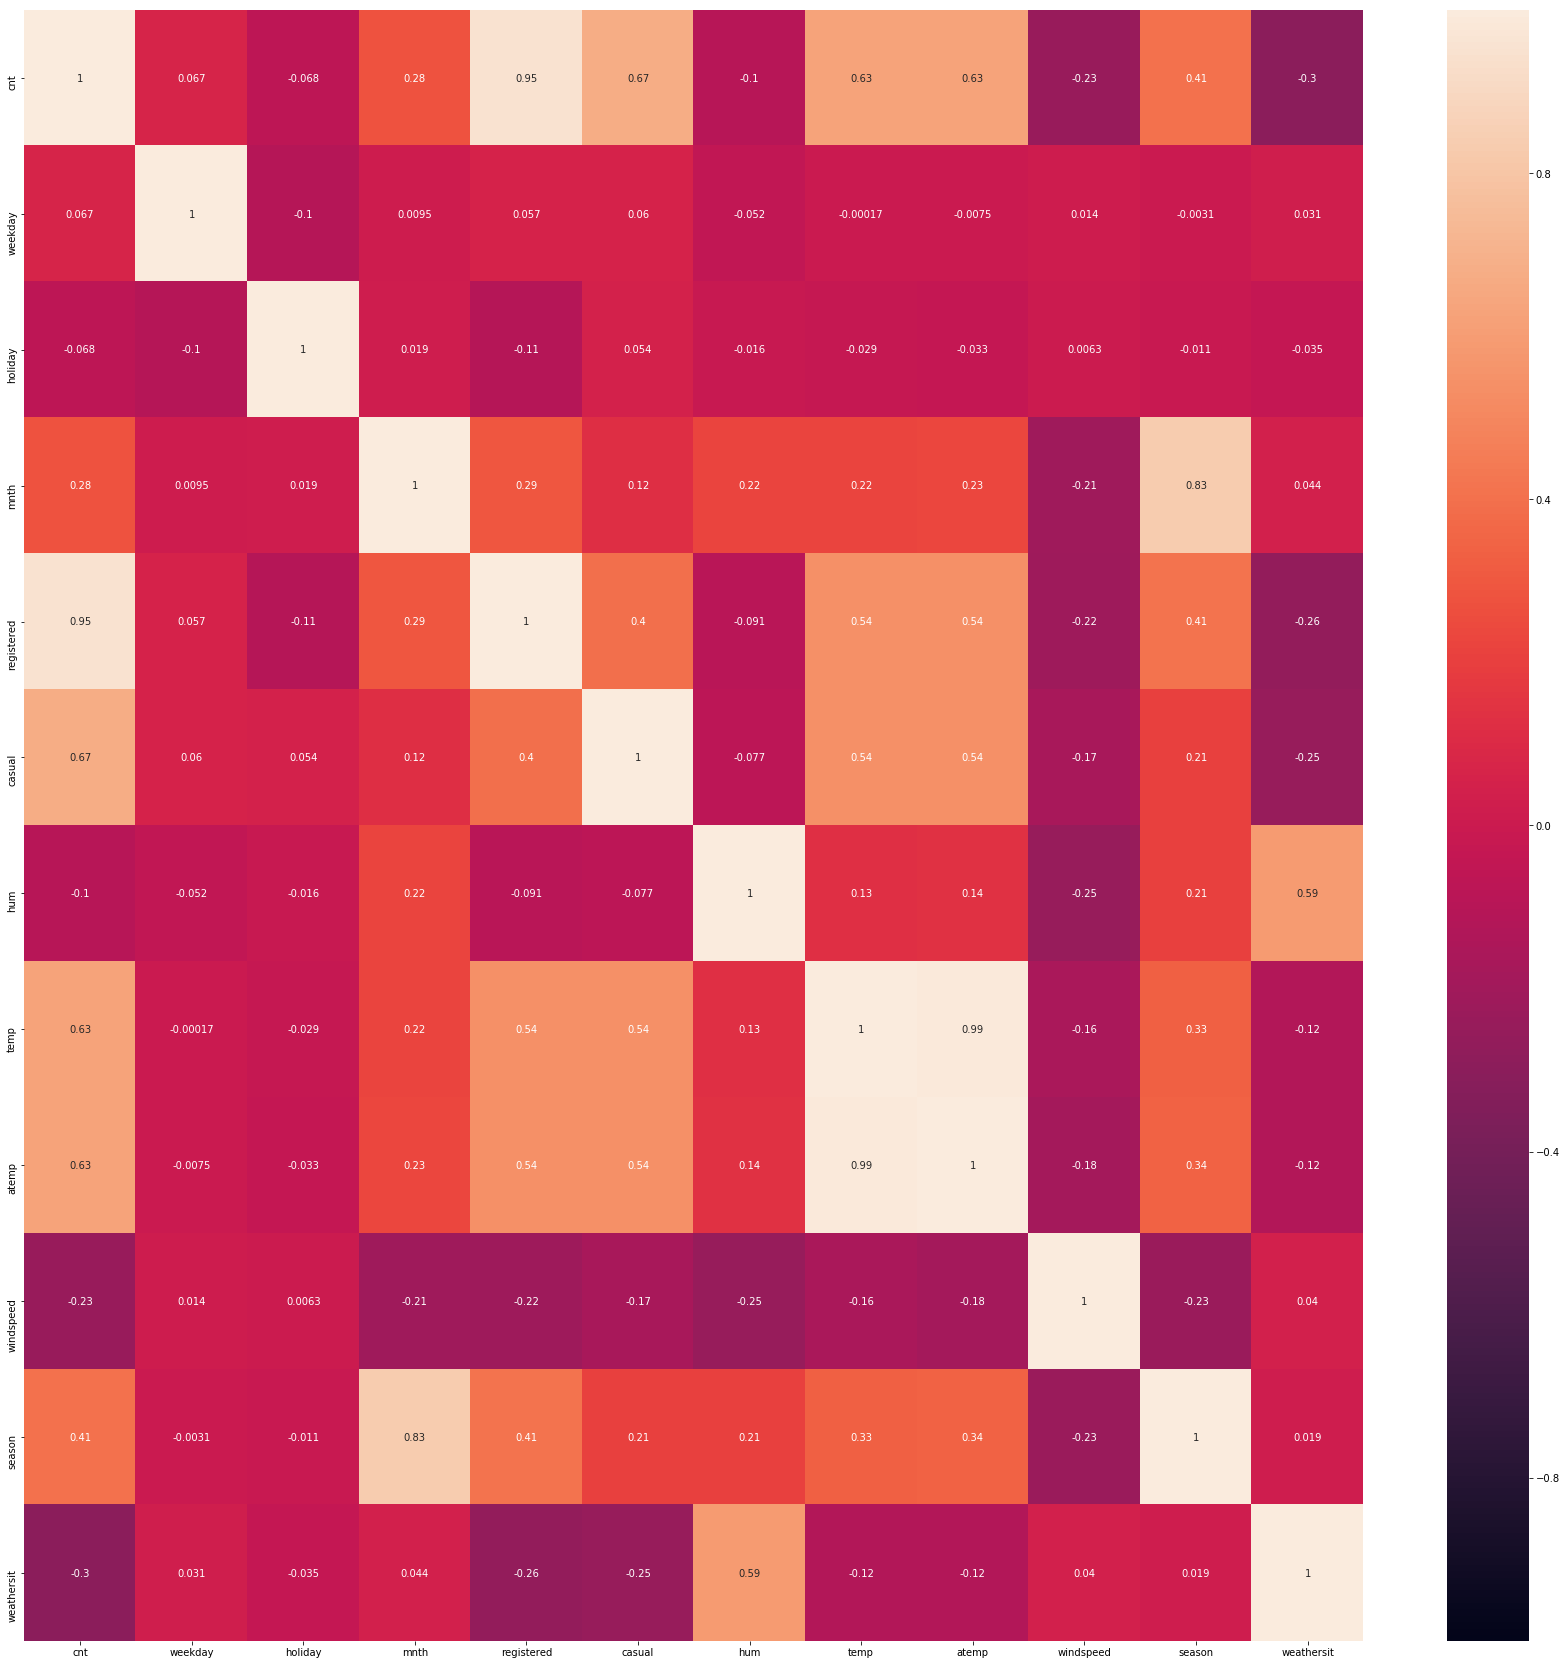

In [139]:
Cols=['cnt','weekday','holiday','mnth','registered','casual','hum','temp','atemp','windspeed','season','weathersit']
Corr=Bike[Cols].corr()
plt.figure(figsize=(30,30))
sns.heatmap(Corr,annot=True,vmax=1,vmin=-1)
plt.show()

## Conclusions
<ul>
    <li>Here We See that the Maximum Correlation is between the Columns temp and atemp(0.99). Hence, One of these Columns can be dropped.</li>
    <li>Here, We also see that the Columns Count(Class Label) and Registered are highly correlated(0.95)</li>
    <li>Also, the Columns season and mnth are highly correlated(0.83).Hence, One of these can be dropped.
</ul>

### Miscellaneous Conclusions
1. On a Holiday wee see that the maximum Bikes were taken on Wednesday.
2. The Least bikes were taken on Tuesdays that were a holiday.
3. The bike sharing counts drop in Winters, especially in the month of January.
4. The Bike Sharing count is maximum in the Season of Fall
5. But, the Maximum Bike Sharing Counts are maximum in June